In [1]:
from d3blocks import D3Blocks
import pandas as pd
import numpy as np

import copy, os

from typing import List
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import d3blocks
d3blocks.__version__

from IPython.display import IFrame

In [3]:
# Notebook based on https://stackoverflow.com/questions/67961842/chord-diagram-in-python

In [126]:
def to_dataframe(matrix, labels=None):
    """
    Convert np.array (matrix) to a pandas dataframe
    
    the weights correspond to the number of transitions between state i (source)
    and state j (target).
    """
    n_states, _ = np.shape(matrix)
    new_df = pd.DataFrame()
    
    sources = np.repeat(np.arange(0, n_states), n_states-1)
    
    if labels is None:
        new_df['source'] = sources
    else:
        new_df['source'] = [labels[i] for i in sources]
        
    targets = np.array([])

    for exclude in range(n_states):
        tmp = np.delete(np.arange(0, n_states), exclude)

        targets = np.append(targets, tmp)
    
    if labels is None:
        new_df['target'] = np.array(targets, dtype=int)
    else:
        new_df['target'] = [labels[int(i)] for i in targets]
    
    weights = np.zeros(len(targets)) 

    for k, (s, t) in enumerate(zip(sources, targets)):

        weights[k] = matrix[int(s)][int(t)]
    new_df['weight'] = weights
    
    return new_df

def to_latex_table(df):
    print ('\\begin{tabular}{| c | c c c c c c c c c c c c c c c c|}')
    print ('\hline')
    header = ' & ' + ' & '.join(np.unique(df['target'])) + ' \\\\'
    print (header)
    print ('\hline\hline')
    for i, source in enumerate(np.unique(df['source'])):
        values = np.array(df.loc[df['source'] == source]['weight'], dtype=int)
        l = np.insert(np.array(values, dtype=str), i, '--')
        line = f'{source} &' + ' & '.join(l) + ' \\\\'
        print (line)
    print ('\hline')
    print ('\end{tabular}')

### Plot the data for the FXa dataset

In [127]:
tr_matrices = np.load('../data/FXA/state_transitions_complex.npy')

In [128]:
labels= ['1a', '1b', '2a', '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a', '8b']

In [129]:
df = to_dataframe(np.sum(tr_matrices, axis=0), labels)

In [130]:
# Try taking the log 
#df_logged = copy.deepcopy(df)
#tmp = df['weight']
#tmp[tmp == 0] = 1
#df_logged['weight'] = np.log(tmp) # tmp ** (1/3)  #np.sqrt(tmp)

In [132]:
# to_latex_table(df)

# Plot 

In [9]:
def make_chord_diagram_fxa(df, outfile, labels, cmap = 'magma'):
    d3 = D3Blocks(chart='Chord', frame=False,)

    d3.config['fontsize'] = 18
    d3.config['ordering'] = ''
    d3.config['arrowhead'] = 1
    d3.config['filepath'] = outfile
    d3.config['figsize'] = [600, 600]
    d3.config['notebook'] = True
    d3.config['save_button'] = True

    d3.set_node_properties(df, opacity=1, cmap=cmap, fontsize=18)
    d3.set_edge_properties(df, color='source', opacity=0.8)

    d3.show()
    
    return d3

# Plot the exchanges at s=1 and s=2 for FXa

In [16]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file_fxa_s1.html"


d3 = make_chord_diagram_fxa(df, outfile, labels, cmap='Greens')

IFrame('d3blocks_file_fxa_s1.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/fileserver/pine/pine2/cchampion/REEDS/2_protonation/paper_programs/notebooks/d3blocks_file_fxa_s1.html]
[d3blocks] >INFO> Display in notebook using IPython.


# Do the same for the GSK3b dataset

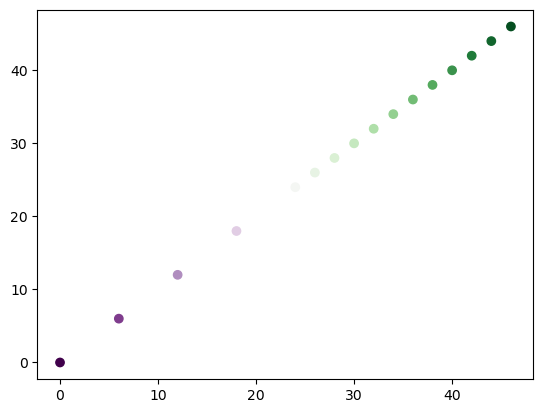

In [84]:
# define the colors:
cmap = plt.cm.PRGn(np.linspace(0,1,48))
fig, ax = plt.subplots(dpi=100)

x = np.arange(48)

ax.scatter(x[0:24:6], x[0:24:6], c=cmap[0:24:6])
ax.scatter(x[24:48:2], x[24:48:2], c=cmap[24:48:2])

all_colors = []
for c in cmap[24:48:2][::-1]:
    all_colors.append(mpl.colors.to_hex(c))
for c in cmap[0:24:6][::-1]:
    all_colors.append(mpl.colors.to_hex(c))

all_colors;

In [85]:
def make_chord_diagram_gsk(df, outfile, all_colors=None):
    d3 = D3Blocks(chart='Chord', frame=False,)
    
    labels = ['9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', '13a', '13b', '14a', '14b', '15a', '15b', '16a', '16b']
    cmap = 'viridis'
    
    d3.config['fontsize'] = 18
    d3.config['ordering'] = ''
    d3.config['arrowhead'] = 1
    d3.config['filepath'] = outfile
    d3.config['figsize'] = [600, 600]
    d3.config['notebook'] = True
    d3.config['save_button'] = True

    d3.set_node_properties(df, opacity=1, cmap=cmap, fontsize=18)
    d3.set_edge_properties(df, color='source', opacity=0.8)
    
    if all_colors is not None:
        for i in range(0, 16):
            d3.node_properties.get(labels[i])['color'] = all_colors[i]
            d3.edge_properties.loc[d3.edge_properties['source'] == labels[i], 'color'] = all_colors[i]
    
    d3.show()
    
    return d3

In [110]:
labels = ['9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', '13a', '13b', '14a', '14b', '15a', '15b', '16a', '16b']

In [143]:
# to print latex table use these labels just so sorting is ok
# labels= ['1a', '1b', '2a', '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a', '8b']

In [135]:
tr_matrices_s2 = np.load('../data/GSK3b/state_transitions_complex_s2.npy')

In [136]:
tr_matrices_alls = np.load('../data/GSK3b/state_transitions_complex_all_s.npy')

In [140]:
df = to_dataframe(np.sum(tr_matrices_s2, axis=0), labels)
# to_latex_table(df)

In [142]:
df_alls = to_dataframe(np.sum(tr_matrices_alls, axis=0), labels)
#to_latex_table(df_alls)

In [39]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file_gsk_s2.html"

d3 = make_chord_diagram_gsk(df, outfile, all_colors)

IFrame('d3blocks_file_gsk_s2.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/fileserver/pine/pine2/cchampion/REEDS/2_protonation/paper_programs/notebooks/d3blocks_file_gsk_s2.html]
[d3blocks] >INFO> Display in notebook using IPython.


In [40]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file_gsk_all_s.html"

d3 = make_chord_diagram_gsk(df_alls, outfile, all_colors)

IFrame('d3blocks_file_gsk_all_s.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/fileserver/pine/pine2/cchampion/REEDS/2_protonation/paper_programs/notebooks/d3blocks_file_gsk_all_s.html]
[d3blocks] >INFO> Display in notebook using IPython.
